In [151]:
import pandas as pd
import numpy as np
import os
from datetime import timedelta, date
from ast import literal_eval
from matplotlib import pyplot as plt

# load transaction data
trans_df = pd.read_csv('../../../data/cabot_data/sprint_3/trans_s3_raw.csv',
                       parse_dates=['LOOK_DATE'])

# load predicted lambdas
lamb_df = pd.read_csv('/Users/johngao/work/thesis/em-hotel-demand-estimation/EM_extension/model/sprint4/sprint4_results.csv')

In [152]:
# get binary value from purchases
trans_df['PURCHASE_COUNT'] = trans_df['PRODUCT'].astype(str) != 'nan'
trans_df['PURCHASE_COUNT'] = trans_df.apply(lambda row: 1 if row['PURCHASE_COUNT'] == True else 0, axis=1)

# get look weeks
trans_df['LOOK_WEEK'] = trans_df.apply(lambda row: row['LOOK_DATE'].week, axis=1)

# transform look day into numbers
trans_df['LOOK_DOY'] = trans_df.apply(lambda row: row['LOOK_DATE'].dayofyear - 1, axis=1)

# process predicted lambdas
num_days = 299
lamb_df = lamb_df.iloc[lamb_df.index > len(lamb_df) - (num_days + 1),:]
lamb_df = lamb_df.reset_index().drop(['index','var'], axis=1)
lamb_df['LOOK_DOY'] = lamb_df.index + 1
lamb_df = lamb_df.rename(index=str, columns={" value": "pred_lambda"})

# merge predicted lambdas into main df
trans_df = trans_df.merge(lamb_df, on='LOOK_DOY')

# get daily counts and diff
daily_count = trans_df.drop(['INTRADAY', 'LOOK_WEEK', 'LOOK_DATE'],axis=1).groupby('LOOK_DOY').sum()
daily_count['diff'] = daily_count['PURCHASE_COUNT'] - daily_count['pred_lambda']
daily_count = daily_count.drop(['PURCHASE_COUNT', 'pred_lambda'], axis = 1)

In [156]:
vert_hist = np.histogram(sample, bins=30)
ax1 = plt.subplot(2, 1, 1)
ax1.plot(vert_hist[0], vert_hist[1][:-1], '*g')

ax2 = plt.subplot(2, 1, 2)
ax2.hist(sample, bins=30, orientation="horizontal");
plt.show()

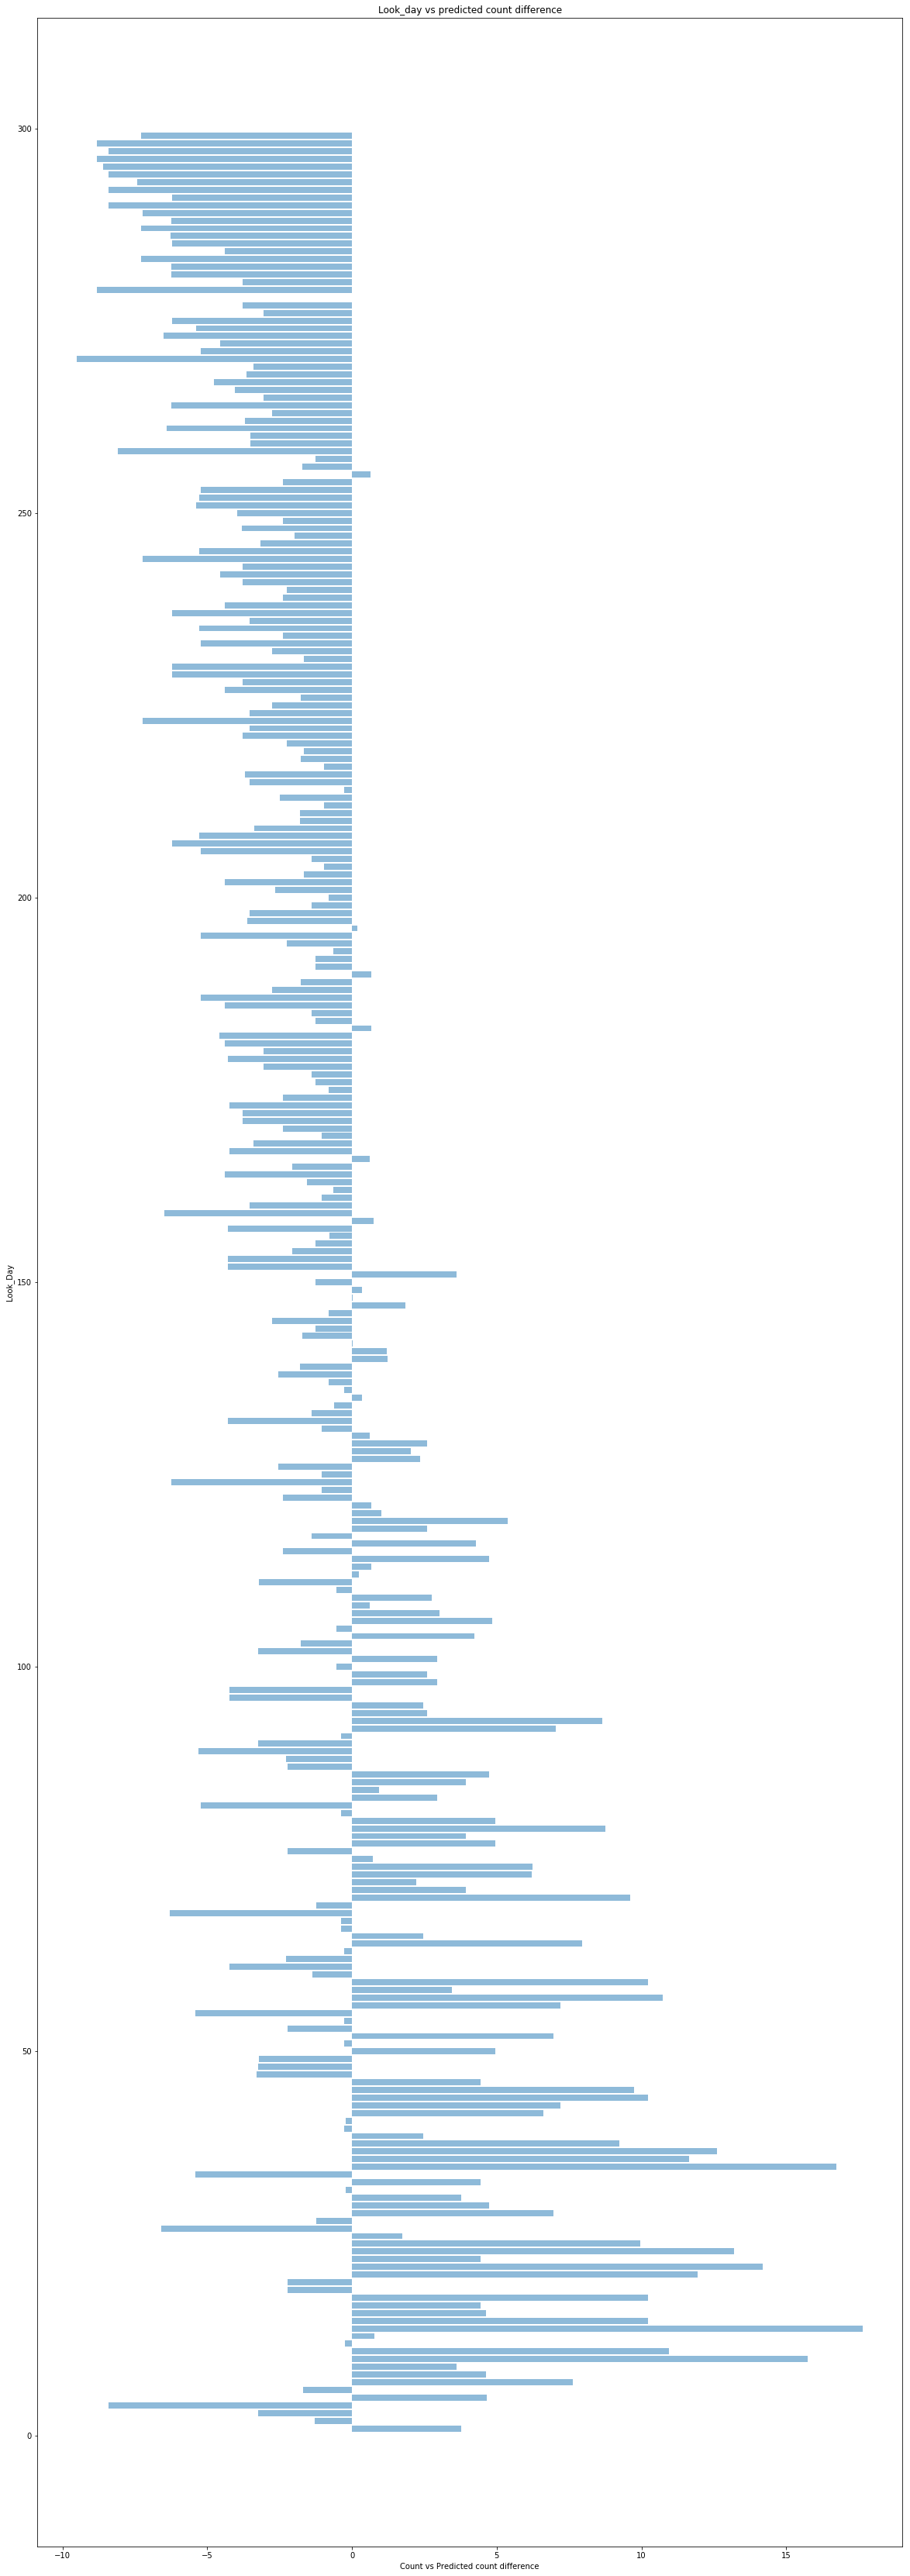

In [176]:
plt.figure(figsize=(20,60))
plt.barh(daily_count.index, daily_count['diff'], align='center', alpha=0.5)
plt.ylabel('Look_Day')
plt.xlabel('Count vs Predicted count difference')
plt.title('Look_day vs predicted count difference')

plt.show()

In [ ]:
# nonzero aux spend
aux_pos = df[df['TDEBIT'] > 0]['TDEBIT']
n, bins, patches = plt.hist(aux_pos, 60, facecolor='g', alpha=0.75)
plt.xlabel('Aux spend')
plt.ylabel('# of Reservations')
plt.title('Aux spend frequency (nonzero)')
plt.grid(True)
plt.savefig('figures/aux_frequencies/nonzero_aux_frequency.svg', format='svg')
plt.show()

In [158]:
vert_hist = np.histogram(daily_count, bins=30)
vert_hist.plot(vert_hist[0], vert_hist[1][:-1], '*g')

AttributeError: 'tuple' object has no attribute 'plot'

In [106]:
lamb_df

,value,LOOK_DOY
0,0.163281,1
1,0.139484,2
2,0.151038,3
3,0.103955,4
4,0.152302,5
5,0.107276,6
6,0.189887,7
7,0.189887,8
8,0.189887,9
9,0.287124,10


In [62]:
counts_df_daily = trans_df[['LOOK_DATE', 'PURCHASE_TF', 'LOOK_WEEK']]

In [ ]:
counts_df_daily = counts_df_daily.groupby('LOOK_DATE').sum()